# ESR - Electrical Symbol Recognition using yolov7

In this notebook different custom datasets and model settings will be explored. The pytorch-based implementation provided by the authors of the original yolov7 paper will be used: https://github.com/WongKinYiu/yolov7


#### |
#### |


 
### References
#### Simple guide to get started
*   https://medium.com/mlearning-ai/object-detection-with-yolov7-a74fa1f03c7e


#### Additional command line examples for inference/testing
*   https://blog.paperspace.com/train-yolov7-custom-data/

#### Changing anchor boxes
*   https://towardsdatascience.com/yolov7-a-deep-dive-into-the-current-state-of-the-art-for-object-detection-ce3ffedeeaeb
*   https://github.com/Chris-hughes10/Yolov7-training/



In [1]:
import os
import random
import shutil
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

random_state = 42

In [15]:
from google.colab import files

# Two types of data

### Manually labeled
The image data was sourced from txdot.ftp and labels were manually created using a tool called [label-studio](https://labelstud.io/)

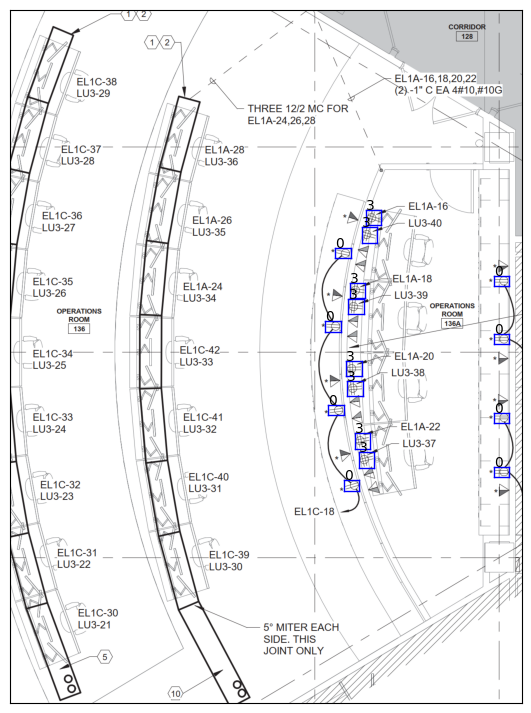

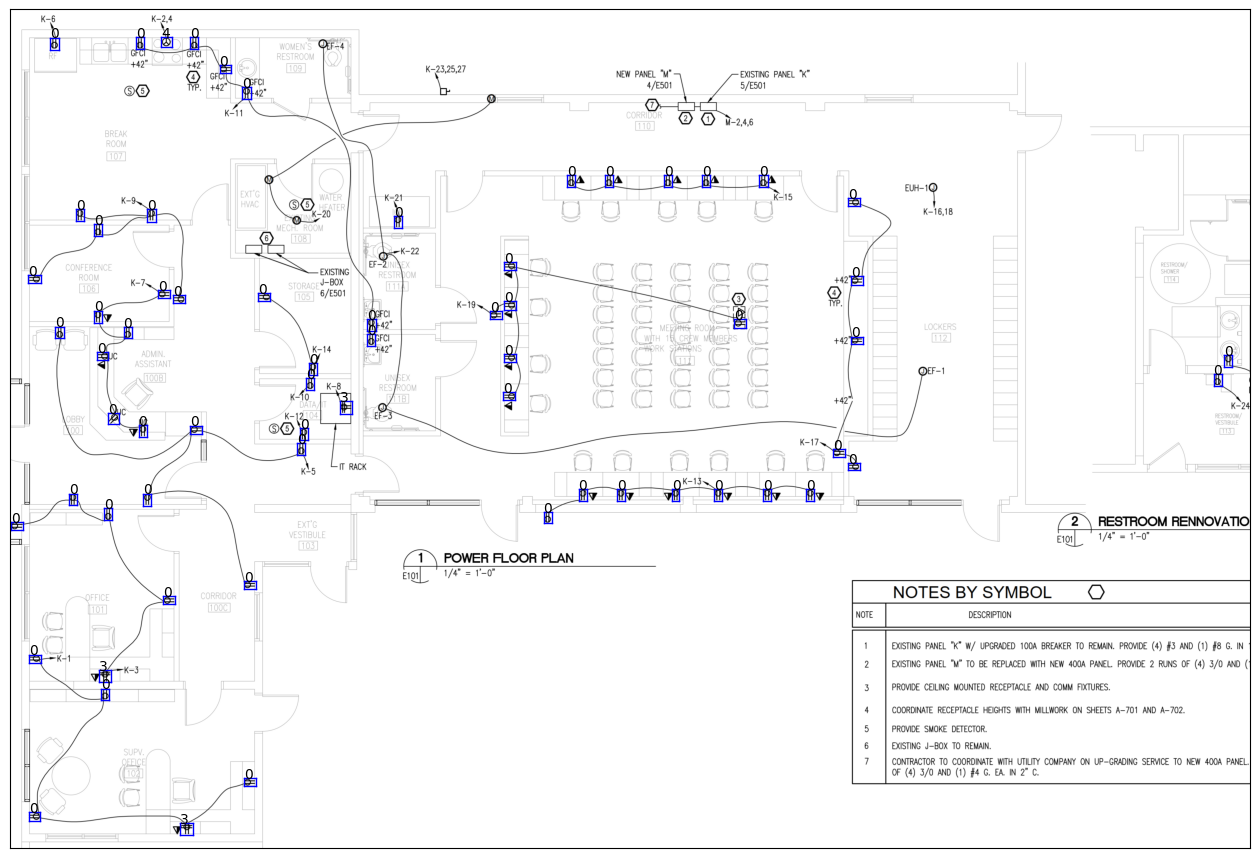

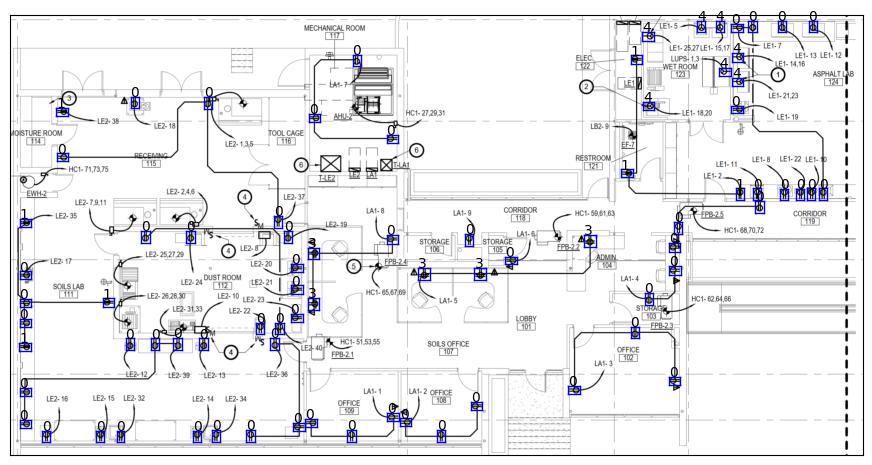

In [2]:
!gdown -qq 1uLE4MTxxoYkrX0V3GD3ycrAbRqMPaA3C
!wget -qq https://github.com/rdstern90/DSBA-6165-Project/raw/main/Training%20Data%20Creation/utility_funcs.py
!unzip -qq input_data.zip

base_dir = "./input_data/with_symbols/images/"
files = os.listdir(base_dir)
paths = random.sample([base_dir+file for file in files],3)

from utility_funcs import show_img
for path in paths:
  show_img(path, labels=True)

## Original yolov7 implementation using pytorch for the backend

In [2]:
!git clone https://github.com/WongKinYiu/yolov7.git

# download training weights
!wget -qq https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.41 MiB | 33.77 MiB/s, done.
Resolving deltas: 100% (488/488), done.


### Generate training samples from full size images
With imagefiles up to 5429x2573 px in size, some sort of sampling/splitting is necessary. The sampling strategy employed uses a point seed for the top left corner of each potential sample, which may or may not be used directly, depending on if the sample image border intersects a labeled symbol or not. If the sample edge intersects a symbol, random small translations are tested until a sample can succesfully be saved. The process/algorithm that does this can be found in the notebook:

```
extract_symbols_generate_yolo_data.ipynb
```
The appended digits in the names of these 3 zip-files:
*   manual_training_data_000.zip
*   **manual_training_data_020.zip**
*   manual_training_data_060.zip
*   manual_training_data_085.zip

...are in reference to a target overlap variable (higher overlap generates more seed points) used when building the training image sets.

While some sort of sampling/splitting is necessary when the imagefiles are up to 5429x2573 px, increasing the sample overlap above some minimum value that ensures that most labeled objects are present in the samples without being   can be used as a sort of data augmentation.

### Testing data
...

# manual_training_data_020.zip

In [78]:
# reset/testing
#
#
#
 
# !rm -rf images_manual/
# !rm -rf labels_manual/
# !rm manual_training_data_000_info.txt
# !rm manually_labeled_images.csv

# !rm -rf yolov7/train
# !rm -rf yolov7/valid
# !rm -rf yolov7/test

# os.makedirs("yolov7/train/labels"), os.makedirs("yolov7/train/images")
# os.makedirs("yolov7/valid/labels"), os.makedirs("yolov7/valid/images")
# os.makedirs("yolov7/test/labels"), os.makedirs("yolov7/test/images")

#
#
#
#

In [3]:
!gdown -qq 1UrMlK170RUJ93a7tMMmnkDRDCjoB3WqX  ## manual 020
!unzip -qq manual_training_data_020.zip
!rm manual_training_data_020_info.txt
!rm manual_training_data_020.zip

Each line in the .csv file "manually_labeled_images" represents a bounding box present in an image in the dataset.

In [4]:
df = pd.read_csv("manually_labeled_images.csv")
!rm manually_labeled_images.csv
print(f"Number of images in dataset: {len(df['image'].unique())}")

Number of images in dataset: 270


In [5]:
df.rename(columns={'type':'object_label'}, inplace=True)
df.head(20)

,bbx_id,object_label,xmin,xmax,ymin,ymax,crop_size,image,image_id,has_annotation,class_id
0,0.0,duplex,171.0,203.0,115.0,138.0,512,0000_plan01.png,0.0,True,0.0
1,1.0,duplex,249.0,272.0,106.0,138.0,512,0000_plan01.png,0.0,True,0.0
2,2.0,duplex,203.0,236.0,134.0,156.0,512,0000_plan01.png,0.0,True,0.0
3,3.0,duplex,171.0,203.0,231.0,254.0,512,0000_plan01.png,0.0,True,0.0
4,4.0,duplex,204.0,235.0,264.0,286.0,512,0000_plan01.png,0.0,True,0.0
5,5.0,duplex,261.0,283.0,352.0,382.0,512,0000_plan01.png,0.0,True,0.0
6,6.0,duplex,365.0,388.0,352.0,383.0,512,0000_plan01.png,0.0,True,0.0
7,7.0,duplex,281.0,304.0,250.0,277.0,512,0000_plan01.png,0.0,True,0.0
8,8.0,duplex,365.0,387.0,250.0,277.0,512,0000_plan01.png,0.0,True,0.0
9,9.0,duplex,429.0,462.0,267.0,290.0,512,0000_plan01.png,0.0,True,0.0


There are 2 classes in the dataset:

(-1 is used to denote a background image, the label text file for a background image that is empty, this is not considered a real class)

In [6]:
print(df["object_label"].unique())
print(df["class_id"].unique())

['duplex' nan 'quad']
[ 0. -1.  1.]


In [7]:
df.groupby(["object_label"])["bbx_id"].count()

object_label
duplex    631
quad      129
Name: bbx_id, dtype: int64

### Creating a concatenated string based on dummy variables
...to be used in the next step for stratified sampling

In [8]:
dfg = pd.concat([df["image"], pd.get_dummies(df["class_id"], "cid")], axis=1)
dfg = dfg.groupby(["image"]).max()
dfg.head()

,cid_-1.0,cid_0.0,cid_1.0
image,,,
0000_plan01.png,0,1,0
0001_plan01.png,0,1,0
0002e_plan01.png,1,0,0
0003_plan01.png,0,1,0
0004_plan01.png,0,1,0


In [9]:
cid_combination = []
for _, row in dfg.iterrows():
    cid_combination.append(str(row["cid_-1.0"])+"-"+str(row["cid_0.0"])+"-" + str(row["cid_1.0"]))

dfg["cid_combination"] = cid_combination
print(dfg["cid_combination"].value_counts())

0-1-0    131
0-1-1     63
1-0-0     61
0-0-1     15
Name: cid_combination, dtype: int64


### Create trainining, validation and test sample
The remaining images can now be sampled in a stratifed fashion, making sure that especially the relatively fewer 'swich' labeles are represented in both the training and validation set

This can be done with the well known sklearn train_test_split function

In [10]:
train_frac = 0.6
valid_frac = 0.25
test_frac = 0.15

x = dfg.index.values
y = dfg["cid_combination"]
train_files, test_files, y_train, y_test = train_test_split(x, y, test_size=test_frac, stratify=y, random_state=42)
train_files, valid_files, y_train, y_valid = train_test_split(train_files, y_train, test_size=valid_frac/(1-test_frac), stratify=y_train, random_state=random_state)

print(f"n train: {len(train_files)}, n valid: {len(valid_files)}, n test: {len(test_files)} (ntot: {len(x)})")

n train: 161, n valid: 68, n test: 41 (ntot: 270)


#### Create utility function to move image and label files based on created sample lists

Passing an empty list, train = [ ] means that exisiting train images in the target directory will be unaffected

In [11]:
def move_images(src_paths, train, valid, test):

  if not os.path.isdir("yolov7/train/labels"):
      os.makedirs("yolov7/train/labels"), os.makedirs("yolov7/train/images")
  if not os.path.isdir("yolov7/valid/labels"):
      os.makedirs("yolov7/valid/labels"), os.makedirs("yolov7/valid/images")
  if not os.path.isdir("yolov7/test/labels"):    
      os.makedirs("yolov7/test/labels"), os.makedirs("yolov7/test/images")

  for i, file_set in enumerate([train, valid, test]):

    if len(file_set) == 0:
        continue

    for file in file_set:
        img_src = src_paths[0] + file
        txt_src = src_paths[1] + file[:-4]+".txt"

        if i == 0:
            img_dst = "yolov7/train/images/"+file
            txt_dst = "yolov7/train/labels/"+file[:-4]+".txt"
        elif i == 1:
            img_dst = "yolov7/valid/images/"+file
            txt_dst = "yolov7/valid/labels/"+file[:-4]+".txt"
        else:
            img_dst = "yolov7/test/images/"+file
            txt_dst = "yolov7/test/labels/"+file[:-4]+".txt"


        os.rename(img_src, img_dst)
        os.rename(txt_src, txt_dst)

  shutil.rmtree(src_paths[0])
  shutil.rmtree(src_paths[1])

In [12]:
src_paths = ["images_manual/", "labels_manual/"]

move_images(src_paths, train_files, valid_files, test_files)

### Making minimal modifications to the model configuration before starting training

In [13]:
# create a new custom config file by copying "yolov7.yaml...
# and changing line 2 where the number of classes is defined (originally 80 classes)

with open("/content/yolov7/cfg/training/yolov7.yaml", "r") as f:
    content = f.readlines()
    content[1] = "nc: 2  # number of classes\n"

with open("/content/yolov7/cfg/training/esr_v1.yaml", "w") as f:
    f.writelines(content)



# Create file that defines where..
# 1. the training, validation, test samples+labels are located
# 2. the number of classes
# 3. class names

with open("/content/yolov7/data/esr.yaml", "w") as f:
    f.write("train: ./yolov7/train\n")
    f.write("val: ./yolov7/valid\n")
    f.write("test: ./yolov7/test\n\n")
    f.write("# Classes\n")
    f.write("nc: 2  # number of classes\n")
    f.write("names: ['duplex', 'quad']")

In [105]:
run_name = "run_b2"
epochs = 300

!python yolov7/train.py --workers 8 --device 0 --batch-size 32 --weights yolov7_training.pt --data yolov7/data/esr.yaml --img 512 --cfg yolov7/cfg/training/esr_v1.yaml --name $run_name --epochs $epochs

2023-04-23 01:07:03.850944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 01:07:05.438096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7_training.pt', cfg='yolov7/cfg/training/esr_v1.yaml', data='yolov7/data/esr.yaml', hyp='./yolov7/data/hyp.scratch.p5.yaml', epochs=300, batch_size=32, img_size=[512, 512], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='run_b2'

In [93]:

# !rm manual_training_data_000.zip
# !rm manual_training_data_000_info.txt
# !rm manually_labeled_images.csv
# !rm -r yolov7/train/
# !rm -r yolov7/valid/
# !rm -r yolov7/test/

In [16]:
# save the best weights and other run outputs
run_zip = run_name+".zip"
basepath = "runs/train/"
wghts = "/weights"
best_wghts = "/best.pt"

!cp $basepath$run_name$wghts$best_wghts $basepath$run_name$best_wghts
!rm -rf $basepath$run_name$wghts
!cp -r $basepath$run_name $run_name
!rm -rf $basepath$run_name

!zip -qq -r $run_zip $run_name
files.download(run_zip)
!rm -r run_b2
# !rm run_b2.zip

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# b2 weights
### Evaluate: run test.py with model b2 weights

In [24]:
if 'run_b2.zip' not in os.listdir():
    !gdown -qq 1FZ_yqbyvqwQt5xop2FvI5krZmmn1mawh
!unzip -qq run_b2.zip

In [25]:
run_name_test = run_name+"_test"  # test run name
best_wght_path = run_name+"/best.pt"

!python yolov7/test.py --weights $best_wght_path --data yolov7/data/esr.yaml --img-size 512 --save-txt --task test --name $run_name_test --no-trace

Namespace(weights=['run_b2/best.pt'], data='yolov7/data/esr.yaml', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='run_b2_test', exist_ok=False, no_trace=True, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
test: Scanning 'yolov7/test/labels.cache' images and labels... 41 found, 0 mis

In [27]:
# save test results
test_zip = run_name_test+".zip"
basepath = "runs/test/"

!cp -r $basepath$run_name_test $run_name_test
!rm -rf $basepath$run_name_test

!zip -qq -r $test_zip $run_name_test
files.download(test_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Evaluate on test set2 (unseen plans, some not from txdot)

In [28]:
if "run_b2" not in os.listdir():
    if "run_b2.zip" not in os.listdir():
        !gdown -qq 1FZ_yqbyvqwQt5xop2FvI5krZmmn1mawh
    !unzip -qq run_b2.zip

In [ ]:
!gdown -qq 1qtvl1TPhhH9zqFJUeS9q8t6ZUmLVx-3l
!unzip -qq test_manual_labels_unseen_plans.zip
!rm manually_labeled_images.csv

In [32]:
!rm -r yolov7/test/
test_files = os.listdir("images_manual")
src_paths = ["images_manual/", "labels_manual/"]

move_images(src_paths, [], [], test_files)

In [34]:
run_name_test = run_name+"_test_set2"  # test run name
best_wght_path = run_name+"/best.pt"

!python yolov7/test.py --weights $best_wght_path --data yolov7/data/esr.yaml --img-size 512 --save-txt --task test --name $run_name_test --no-trace

Namespace(weights=['run_b2/best.pt'], data='yolov7/data/esr.yaml', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='run_b2_test_set2', exist_ok=False, no_trace=True, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
test: Scanning 'yolov7/test/labels' images and labels... 108 found, 0 mis

In [35]:
# save test results
test_zip = run_name_test+".zip"
basepath = "runs/test/"

!cp -r $basepath$run_name_test $run_name_test
!rm -rf $basepath$run_name_test

!zip -qq -r $test_zip $run_name_test
files.download(test_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# z1 weights
### Evaluate: run test.py with model z1 weights

In [37]:
!gdown -qq 19FUmJtnLRZAagbkOgIrpWhrRClXKYHZB
!unzip -qq run_z1.zip

Archive:  run_z1.zip
   creating: run_z1/
  inflating: run_z1/best.pt          


#### Evaluation image set1

In [38]:
!gdown -qq 1ObgIwIKKa06vp4M2aq7SVz8Nh5tOLbq6
!unzip -qq test_manual_labels_020.zip

In [ ]:
!rm -r yolov7/test  # remove existing test images and labels
test_files = os.listdir("test_manual_labels_020/images/")
src_paths = ["test_manual_labels_020/images/", "test_manual_labels_020/labels/"]

move_images(src_paths, [], [], test_files)

!rm -r test_manual_labels_020

In [45]:
run_name = "run_z1"
run_name_test = run_name+"_test"  # test run name
best_wght_path = run_name+"/best.pt"

!python yolov7/test.py --weights $best_wght_path --data yolov7/data/esr.yaml --img-size 512 --save-txt --task test --name $run_name_test --no-trace

Namespace(weights=['run_z1/best.pt'], data='yolov7/data/esr.yaml', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='run_z1_test', exist_ok=False, no_trace=True, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
test: Scanning 'yolov7/test/labels' images and labels... 41 found, 0 missing, 

In [46]:
# save test results
test_zip = run_name_test+".zip"
basepath = "runs/test/"

!cp -r $basepath$run_name_test $run_name_test
!rm -rf $basepath$run_name_test

!zip -qq -r $test_zip $run_name_test
files.download(test_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### z1 weights: Test set2 (unseen plans, some not from txdot)

In [47]:
if "test_manual_labels_unseen_plans" not in os.listdir():
    if "test_manual_labels_unseen_plans.zip" not in os.listdir():
        !gdown -qq 1qtvl1TPhhH9zqFJUeS9q8t6ZUmLVx-3l
    !unzip -qq test_manual_labels_unseen_plans.zip
    !rm manually_labeled_images.csv

In [48]:
!rm -r yolov7/test/  # remove existing test images and labels
test_files = os.listdir("images_manual")
src_paths = ["images_manual/", "labels_manual/"]

move_images(src_paths, [], [], test_files)

In [49]:
run_name_test = run_name+"_test_set2"  # test run name
best_wght_path = run_name+"/best.pt"

!python yolov7/test.py --weights $best_wght_path --data yolov7/data/esr.yaml --img-size 512 --save-txt --task test --name $run_name_test --no-trace

Namespace(weights=['run_z1/best.pt'], data='yolov7/data/esr.yaml', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='run_z1_test_set2', exist_ok=False, no_trace=True, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
test: Scanning 'yolov7/test/labels' images and labels... 108 found, 0 mis

In [50]:
# save test results
test_zip = run_name_test+".zip"
basepath = "runs/test/"

!cp -r $basepath$run_name_test $run_name_test
!rm -rf $basepath$run_name_test

!zip -qq -r $test_zip $run_name_test
files.download(test_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>